**Arquivo de entrada disponível em:**https://github.com/silvioedu/IGTI-MachileLearningBootcamp/blob/main/modulo_2/pratica/data.csv

# Configurações

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

warnings.filterwarnings('ignore')
sns.set()

In [154]:
filename = 'input/data.csv'
df = pd.read_csv(filename)

In [155]:
def plot_feature(df, feature):
  """ Plotar boxplot e distplot
  ----------------------------
  df     : dataframe
  feature: variável disponível
  """  
  fig, axes = plt.subplots(1,2, figsize=(18,5))
  plt.suptitle(f"Feature '{feature}'")

  sns.boxplot(df[feature],ax = axes[0])
  sns.distplot(df[feature], kde=False, ax = axes[1])
  plt.xlabel("")


# Análise exploratória

## Geral

In [156]:
df.head().T

,0,1,2,3,4
PatientId,2.98725e+13,5.58998e+14,4.26296e+12,8.67951e+11,8.84119e+12
AppointmentID,5642903,5642503,5642549,5642828,5642494
Gender,F,M,F,F,F
ScheduledDay,2016-04-29T18:38:08Z,2016-04-29T16:08:27Z,2016-04-29T16:19:04Z,2016-04-29T17:29:31Z,2016-04-29T16:07:23Z
AppointmentDay,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z
Age,62,56,62,8,56
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA
Scholarship,0,0,0,0,0
Hipertension,1,0,0,0,1
Diabetes,0,0,0,0,1


In [157]:
df.shape

(110527, 14)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [159]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [160]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [161]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

## Por feature

Age

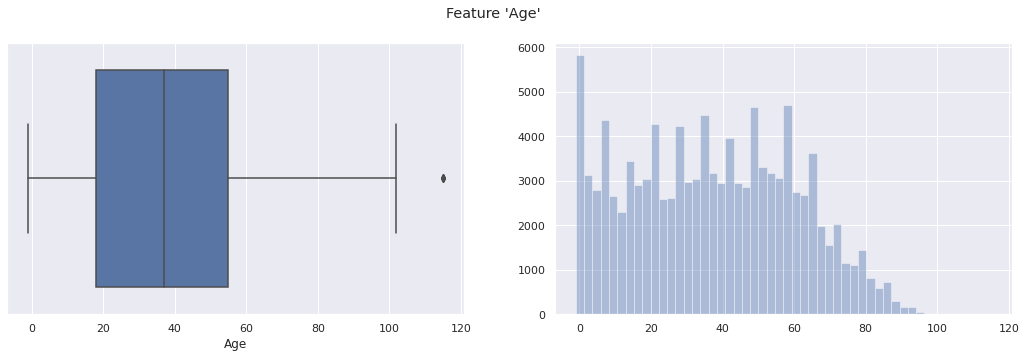

In [162]:
# Qual a idade média dos pacientes?
plot_feature(df, 'Age')

In [163]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [164]:
df.Age[df.Age < 0] = df.Age.mean()

Neighbourhood

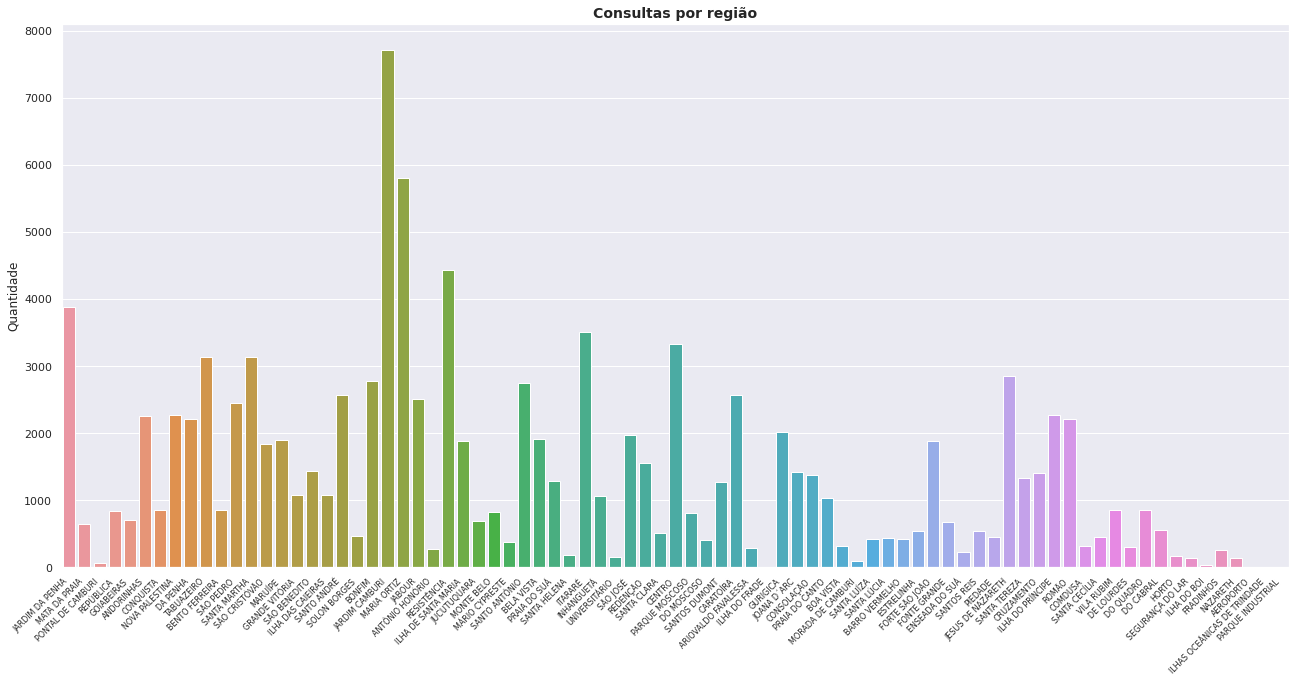

In [165]:
#plotando o número de consultas por região 
plt.figure(figsize=(22,10))
ax = sns.countplot(x='Neighbourhood', data=df, order=df.Neighbourhood.unique())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
plt.ylabel('Quantidade')
plt.xlabel('')
plt.title('Consultas por região', fontsize=14, fontweight='bold')
plt.show()

In [166]:
n_d = {}
i = 0
for n in df.Neighbourhood.unique():
  n_d[n] = i
  i += 1

df.Neighbourhood = df.Neighbourhood.map(n_d)

SMS_received

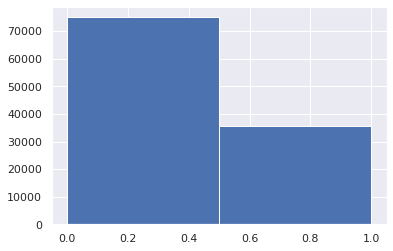

In [167]:
df.SMS_received.hist(bins=len(df.SMS_received.unique()))

In [168]:
df.SMS_received.value_counts(normalize=True)

0    0.678974
1    0.321026
Name: SMS_received, dtype: float64

Gender

In [169]:
df.Gender.value_counts(normalize=True)

F    0.649977
M    0.350023
Name: Gender, dtype: float64

In [170]:
g_d = {'F': 0, 'M': 1}
df.Gender = df.Gender.map(g_d)

Comparecimento X SMS enviado

Text(0, 0.5, 'Frequência')

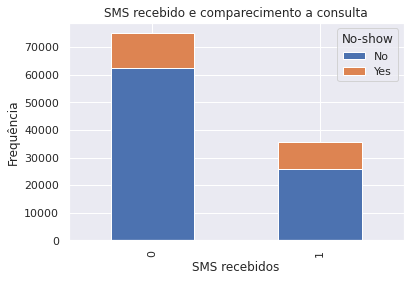

In [172]:
sms_x_comparecer.plot(kind="bar", stacked=True)
plt.title('SMS recebido e comparecimento a consulta') 
plt.xlabel('SMS recebidos') 
plt.ylabel('Frequência')

No-show

In [173]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [174]:
n_d = {'No': 0, 'Yes': 1}
df['No-show'] = df['No-show'].map(n_d)

In [175]:
df['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

# Treinando o modelo e fazendo previsões

In [176]:
x = df[['Gender','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received']]
y = df['No-show']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(f'x_train {x_train.shape}')
print(f'x_test {x_test.shape}')

x_train (77368, 8)
x_test (33159, 8)


## Decision Tree Classifier

In [177]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

print(f'Acurácia {accuracy_score(y_test, y_pred)}')

Acurácia 0.7603968756597003


In [182]:
mtx_conf = confusion_matrix(y_test, y_pred)
print(mtx_conf)

[[24314  2257]
 [ 5688   900]]


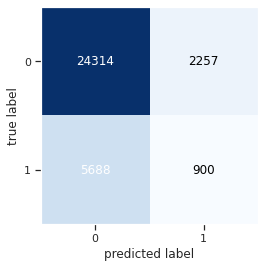

In [183]:
fig, ax = plot_confusion_matrix(conf_mat=mtx_conf)
plt.show()